<a href="https://colab.research.google.com/github/sashwot/414Koirala/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Course-End Project: Regression
Project Statement:
The HR department has been observing an increasing trend in employee
turnover. Concerned about the rising attrition rate, the HR manager plans to
derive insights from the available employee data and predict potential future
turnover.
Objective:
The company's leadership believes that if they can understand the patterns
leading to employee exits, they can implement strategies to improve retention.
Your task is to analyze the provided employee dataset and forecast turnover
rates.
Steps to complete:
1. Perform a data quality check by checking for missing values, if any
2. Balance and then split the data into a test-train split
3. Normalize the input and output data so that they are in the same order of
magnitude
4. Understand what factors contributed most to employee turnover by EDA
5. Train regression models to evaluate which model is the best performer
(using R^2 fit)
6. Train the best model using all available data in the train set
7. Test the performance of the trained model against the test set using
linear regression and output the R^2 fit on the test set


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_data = pd.read_csv('/content/Multiple_linear_regression_dataset.csv')
df_data.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [4]:
#Perform a data quality check by checking for missing values
display(df_data.info())
# Hence their are total 20 entries in the and non of them are null.
display(df_data.describe())
#fairly good mean value not negative but is higher then the total count.
#must have some kind of outlier

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         20 non-null     int64
 1   experience  20 non-null     int64
 2   income      20 non-null     int64
dtypes: int64(3)
memory usage: 608.0 bytes


None

,age,experience,income
count,20.000000,20.000000,20.000000
mean,39.650000,6.200000,40735.500000
std,10.027725,4.124382,8439.797625
min,23.000000,1.000000,27840.000000
25%,31.500000,3.750000,35452.500000
50%,40.000000,5.000000,40190.000000
75%,47.000000,9.000000,45390.000000
max,58.000000,17.000000,63600.000000


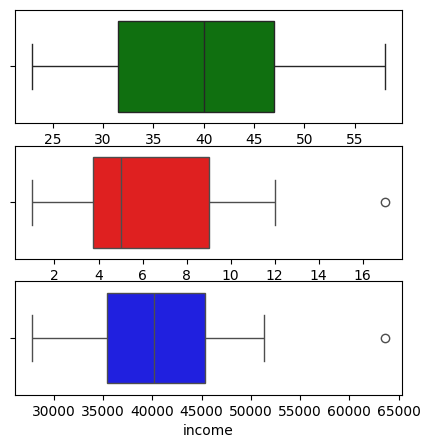

In [5]:
fig, axis = plt.subplots(3, figsize=(5,5))
plt1 = sns.boxplot(df_data["age"], ax = axis[0], orient = 'h', color='g' )
plt2 = sns.boxplot(df_data["experience"], ax = axis[1], orient = 'h', color='r' )
plt3 = sns.boxplot(df_data["income"], ax = axis[2], orient = 'h', color='b' )
#Hence with this figure their is some kind of outlier in income and experience

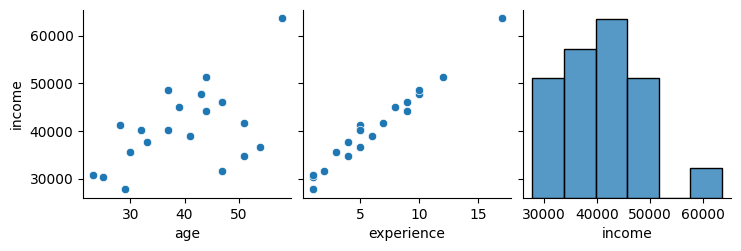

In [6]:
sns.pairplot(df_data, x_vars = ["age", "experience", "income"], y_vars="income")

# Experiance graph is fairly linear but age graph has a lot of distrubance



<Axes: >

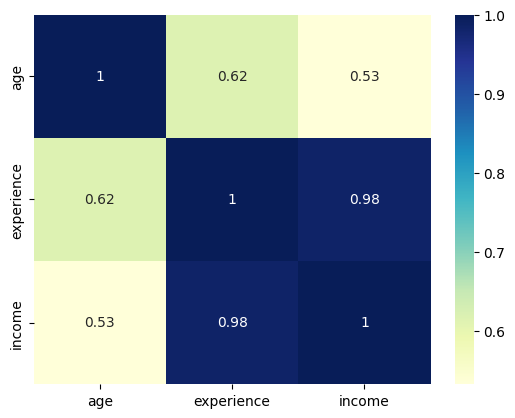

In [7]:
sns.heatmap(df_data.corr(), cmap="YlGnBu", annot= True)
#so their are alot of outliers in income and age experiance and age

In [8]:
x = df_data["experience"]
y = df_data["income"]

In [9]:
#Normalize the input and output data so that they are in the same order of magnitude
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)
x_train.head(20)

16    17
1      3
9      8
14    12
12     5
5      7
2      2
4     10
10     1
0      1
15     6
7      4
3      5
8      5
Name: experience, dtype: int64

In [10]:
# Understand what factors contributed most to employee turnover by EDA
import statsmodels.api as sm
x_train_sm = sm.add_constant(x_train)
#linear_reg = globals()["linear_reg"]
linear_reg = sm.OLS(y_train, x_train_sm).fit()

In [11]:
linear_reg.params
# Hence experience is the turn over factor

const         28032.997800
experience     2049.279428
dtype: float64

In [12]:
linear_reg.summary()


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     516.6
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           3.12e-11
Time:                        14:29:06   Log-Likelihood:                -120.73
No. Observations:                  14   AIC:                             245.5
Df Residuals:                      12   BIC:                             246.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.803e+04    676.406     41.444      0.000    2.66e+04    2.95e+04
experience  2049.2794     90.159     22.730      0.000    1852.840    2245.719
==============================================================================
Omnibus:                        2.835   Durbin-Watson:                   1.061
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                1.070
Skew:                          -0.008   Prob(JB):                        0.586
Kurtosis:                       1.646   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

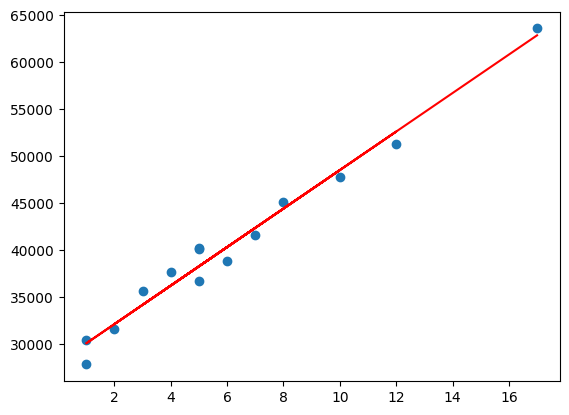

In [13]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 28032.997800 + 2049.279428 * x_train, 'r')

In [14]:
# Train regression models to evaluate which model is the best performer
multi_x = df_data[["age","experience","income"]]
mx_train, mx_test, my_train, my_test = train_test_split(multi_x, y, train_size = 0.3, random_state = 100)

In [15]:
# Train the best model using all available data in the train set
from sklearn.linear_model import LinearRegression
multiLinReg = LinearRegression()
multiLinReg.fit(mx_train, my_train)

LinearRegression()

In [16]:
y_predictions = multiLinReg.predict(mx_test)
y_predictions

array([30870., 48700., 46110., 44190., 34800., 41340., 63600., 35670.,
       45150., 51300., 36720., 41630., 31580., 47830.])

In [17]:
#Test the performance of the trained model against the test set using linear regression and output the R^2 fit on the test set
from sklearn.metrics import r2_score
score = r2_score(my_test, y_predictions)
score_train = r2_score(my_train, multiLinReg.predict(mx_train))
print("R-Squared = " + str(score))
print("Training R-sqaured = " + str(score_train))

R-Squared = 1.0
Training R-sqaured = 1.0
